# Gender Recognition By Voice




In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
#importing libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
# Read our data from dataset.
df=pd.read_csv('voice.csv')
df.columns


Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [14]:
#shape of data
df.shape

(3168, 21)

In [15]:
#type of the data(data type)
df.dtypes

meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
label        object
dtype: object

In [16]:
#reading the data set
df=pd.read_csv('voice.csv')
#first ten
df.head(10)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,...,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160,male
6,0.150762,0.074463,0.160106,0.092899,0.205718,0.112819,1.530643,5.987498,0.967573,0.762638,...,0.150762,0.105945,0.026230,0.266667,0.479620,0.007812,5.312500,5.304688,0.123992,male
7,0.160514,0.076767,0.144337,0.110532,0.231962,0.121430,1.397156,4.766611,0.959255,0.719858,...,0.160514,0.093052,0.017758,0.144144,0.301339,0.007812,0.539062,0.531250,0.283937,male
8,0.142239,0.078018,0.138587,0.088206,0.208587,0.120381,1.099746,4.070284,0.970723,0.770992,...,0.142239,0.096729,0.017957,0.250000,0.336476,0.007812,2.164062,2.156250,0.148272,male
9,0.134329,0.080350,0.121451,0.075580,0.201957,0.126377,1.190368,4.787310,0.975246,0.804505,...,0.134329,0.105881,0.019300,0.262295,0.340365,0.015625,4.695312,4.679688,0.089920,male


In [17]:
#define null values
df.isnull().values.any()


False

In [18]:
#counting the label value
label_value_count=df.label.value_counts()
print(label_value_count)

female    1584
male      1584
Name: label, dtype: int64


female    1584
male      1584
Name: label, dtype: int64


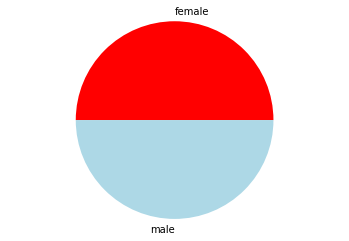

In [19]:
#distribution of target variables
colors=['red','Lightblue']
data_y=df[df.columns[-1]]
plt.pie(data_y.value_counts(),colors=colors,labels=['female','male'])
plt.axis('equal')
print(df['label'].value_counts())


The image shows the distribution of target variables and it shows that the red color is female and the blue color is male

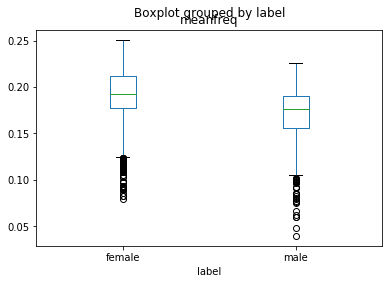

In [20]:
#Box plot comparision in labels by other features
df.boxplot(column='meanfreq',by='label',grid=False)

* In the implementation process, initial thing done is understanding of how the dataset is derived. The sound samples are collected from dataset These samples are stored as a .WAV file, which are then pre-processed for
acoustic analysis using warbleR package in R. The result is the 22 acoustic attributes of the provided sound. Our dataset is madeup of these attributes ignoring one attribute i.e. duration, as duration of all samples is 20 seconds. Therefore, the dataset has 21 attributes. The attributes consist of mainly statistical computations of the frequency (Appendix A). The frequency of female voice is higher than a male voice. After understanding the dataset formulation, data exploration was done. Visualizing the parameters and its dependency gives a better understanding. 
* The image shows difference in mean frequency of male and female voices which  clearly shows male and female voices cannot be determined only based on mean frequency. 

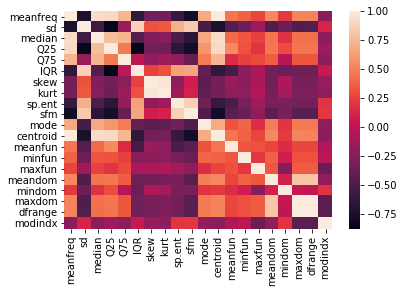

In [21]:
#plot correlation matrix
correlation=df.corr()
sns.heatmap(correlation)
plt.show()

* This analysis showed there is lot of dependencies among all attributes. As, all the data is numerical we can get correlation between them and analyze further By applying PCA (Principle Component Analysis), one can see the correlation being removed among the attributes.
This pre-processed data is now ready to for algorithm application. The algorithms selected are based on research work and papers that showed which algorithms works best. 

# Machine learning


 As Machine Learning algorithms tend to increase accuracy by reducing the error, they do not consider the class distribution. This problem is prevalent in examples such as Fraud Detection, Anomaly Detection, Facial recognition etc.
 Standard ML techniques such as Decision Tree and Logistic Regression have a bias towards the majority class, and they tend to ignore the minority class. They tend only to predict the majority class, hence, having major misclassification of the minority class in comparison with the majority class. In more technical words, if we have imbalanced data distribution in our dataset then our model becomes more prone to the case when minority class has negligible or very lesser recall.
 Imbalanced Data Handling Techniques: There are algorithms that are widely used for handling imbalanced class distribution
### Description:
* Logistic Regression is the appropriate regression analysis to conduct when the dependent variable is dichotomous (binary).      Like all regression analyses, the logistic regression is a predictive analysis and it predicts the probability
*  A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node. Decision Tree is a white box type of ML algorithm. It shares internal decision-making logic, which is not available in the black box type of algorithms such as Neural Network. Its training time is faster compared to the neural network algorithm. The time complexity of decision trees is a function of the number of records and number of attributes in the given data. The decision tree is a distribution-free or non-parametric method, which does not depend upon probability distribution assumptions. Decision trees can handle high dimensional data with good accuracy.
*  Random forest is a type of supervised machine learning algorithm based on ensemble learning. Ensemble learning is a type of learning where you join different types of algorithms or the same algorithm multiple times to form a more powerful prediction model. The random forest algorithm combines multiple algorithms of the same type i.e. multiple decision trees, resulting in a forest of trees, hence the name "Random Forest".


In [22]:
# train_test_split is responsible to split the data into (train and test data)
from sklearn.model_selection import train_test_split
#importing linear regression classifier
from sklearn.linear_model import LogisticRegression
#importing Baysion Classifier
from sklearn.naive_bayes import GaussianNB
#importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier
#importing random forest classifier
from sklearn.ensemble import RandomForestClassifier
#importing theclassification report results 
from sklearn.metrics import classification_report
#importing confusion matrix
from sklearn.metrics import confusion_matrix
#import matrix to calculate accuacy
from sklearn import metrics, neighbors
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

#### Splitting data Frame into Data and Class(X,y), and converting them to NumpyArray

In [23]:
#Splitting dataset into (train,test)
X=df[df.columns[:-1]].values
#y=df['label']
y=df[df.columns[-1]].values
#70-30% of train and test
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.30)

In [24]:
#Random forest classifier
rand_forest = RandomForestClassifier()
rand_forest.fit(Xtrain, ytrain)
y_pred = rand_forest.predict(Xtest)

In [25]:
#accuracy score
print(metrics.accuracy_score(ytest, y_pred))

0.9779179810725552


In [26]:
#confusion matrix test and prediction
print(confusion_matrix(ytest,y_pred))

[[447   9]
 [ 12 483]]


In [27]:
#cross validation of accuracy
from sklearn.model_selection import cross_val_score
CVFirst=GaussianNB()
CVFirst=CVFirst.fit(Xtrain,ytrain)
test_result=cross_val_score(CVFirst,X,y,cv=10,scoring='accuracy')
print('accuracy obtained from 10-fold cross validation is:',test_result.mean())

accuracy obtained from 10-fold cross validation is: 0.8563410933194906


# Data cleaning

Exceptable range of voice freq for a human as per wiki is between 0.085 and 0.255KHz and hence we will identify the variable which has this frequncy information and remove them assuming it to be a outlier based on domain knowledge..In our data set meanfun is the variable which have the value of Fundamental frequency. As per the sitation given in wiki we can say that typical adult male will have a fundamental frequency from 85 to 180 Hz and typical adult female from 165 to 255 Hz.


In [28]:
#male and female function frequency outlier index
male_funFreq_outlier_index = df[((df['meanfun']<0.085) | (df['meanfun'] > 0.180))  &
                                      (df['label']=='male')].index
female_funFreq_outlier_index = df[((df['meanfun']< 0.165) | (df['meanfun']>0.255)) &
                                      (df['label']=='female')].index


In [29]:
#index to remove 
index_to_remove=list(male_funFreq_outlier_index)+list(female_funFreq_outlier_index)
len(index_to_remove)

710

In [30]:
#copy and drop the axis
data_x=df[df.columns[0:20]].copy()
data2=data_x.drop(['kurt','centroid','dfrange'],axis=1).copy()
data2.head(3)
data2=data2.drop(index_to_remove,axis=0)

#y=df['label']
data_y=pd.Series(y).drop(index_to_remove,axis=0)
#train test and split
Xtrain, Xtest ,ytrain ,ytest = train_test_split(data2,data_y,test_size=0.30 )
#classifier1 i.e random forest classifier
clf1=RandomForestClassifier()
clf1.fit(Xtrain, ytrain)
y_pred = clf1.predict(Xtest)
print(metrics.accuracy_score(ytest, y_pred))

0.991869918699187


In [31]:
#classifier2 Desion tree classfier and accuracy score
clf2=DecisionTreeClassifier()
clf2.fit(Xtrain,ytrain)
y_predict=clf2.predict(Xtest)
print(metrics.accuracy_score(ytest,y_pred))

0.991869918699187


In [32]:
#classifier3 GaussianNB and accuracy score
clf3=GaussianNB()
clf3=clf3.fit(Xtrain,ytrain)
y_predd=clf3.predict(Xtest)
print(metrics.accuracy_score(ytest,y_predd))

0.9701897018970189


In [38]:
#classifier4 logistic regression and accuracy score 
clf4=LogisticRegression()
clf4.fit(Xtrain,ytrain)
y_predict4=clf4.predict(Xtest)
print(metrics.accuracy_score(ytest,y_predict4))

0.9281842818428184


C:\Users\sampath\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [25]:
#cross validation with same classify as first time
test_result = cross_val_score(clf3,data2,data_y,cv=10,scoring='accuracy')
print('Accuracy obtained from 10-fold cross validation is:',test_result.mean())

Accuracy obtained from 10-fold cross validation is: 0.9637979094076655


In [26]:
#cross validation on the best result
test_result = cross_val_score(clf2,data2,data_y,cv=10,scoring='accuracy')
print('Accuracy obtained from 10-fold cross validation is:',test_result.mean())

Accuracy obtained from 10-fold cross validation is: 0.9906404513024721


## Confusion matrix

[[291   0]
 [  2 445]]


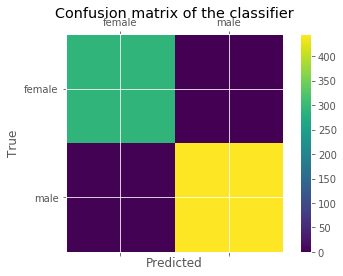

In [27]:
#confusion matrix of the classifier
import pylab as pl
labels =['female', 'male']
cm = confusion_matrix(ytest, y_pred,labels)
print(cm)
fig = plt.figure()
ax=fig.add_subplot(111)
cax=ax.matshow(cm)
pl.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
pl.xlabel('Predicted')
pl.ylabel('True')
pl.show()

Confusion Matrix is going to contain the correct predictions that our model made on the set as well as the incorrect predictions.
291 and 445 are the correct predictions. In addition, 5 and 13 are the incorrect predictions. so we can see that we have quiet lot of correct predictions.

Correct Predictions : 291+445 = 736

Incorrect Predictions: 0+2 = 2

Create a classification report for the model.

In [28]:
#classification report
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

      female       0.99      1.00      1.00       291
        male       1.00      1.00      1.00       447

    accuracy                           1.00       738
   macro avg       1.00      1.00      1.00       738
weighted avg       1.00      1.00      1.00       738



C:\Users\sampath\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


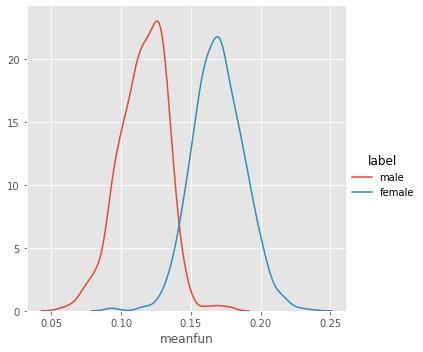

In [29]:
#Distributionof male and female
sns.FacetGrid(df, hue="label", size=5).map(sns.kdeplot, "meanfun").add_legend()
plt.show()

From the grid  the curve is a plot of the mean function of male and female. It shows the tradeoff between sensitivity and specificity.The red curve states the male and the blue one states the female.


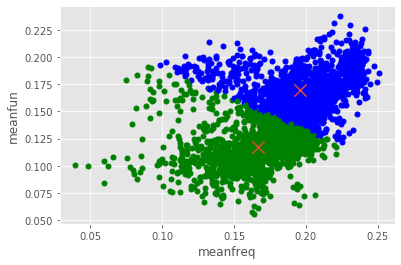

In [30]:
#Doing flat-clustering
from sklearn.cluster import KMeans
from matplotlib import style
style.use('ggplot')
data_x=np.array(df[['meanfreq','meanfun']])
kmeans=KMeans(n_clusters=2)
kmeans.fit(data_x)
centroids=kmeans.cluster_centers_
labels=kmeans.labels_
#print(centroids)
#print(labels) #0-male,1-female(the machine has assigned on its own)

colors=["g.","b."] #green=male
for i in range(len(data_x)):
    plt.plot(data_x[i][0],data_x[i][1],colors[labels[i]],markersize=10)
plt.scatter(centroids[:,0],centroids[:,1],marker="x",s=150,linewidths=5,zorder=10)    
plt.ylabel('meanfun')
plt.xlabel('meanfreq')
plt.show()

* K-means clustering is an elementary but very popular approximate method that can be used to simplify and accelerate convergence. Its goal is to find K mean vectors (µ1, . . . , µK) which will be the K cluster centroids. It is traditional to let K samples randomly chosen from the data set serve as initial cluster centers.
* At a given iteration (top left), points are distributed in two clusters. Their centroids are computed (top right). Then data points are reallocated to the cluster whose centroid is nearest (bottom right) and the new cluster centroids are computed (bottom left).
* The plot shows the mean function and mean frequency of male and female where green as male and blue as female.

### Conclusion:
 From the above model building and evaluation we can predict that random forest classifier is the best algorithm  as it provided best results.There are many factors that can affect and prove different dataset better for acoustic results. Came up with this conclusion, because I understood the process of how the dataset was built so that I can apply the same process and provide an input voice to check its gender.So the best algorithm for Gender Recognition By Voice is is Random Forest.